# Guide library

In [2]:
import tensorflow as tf
from tensorflow.keras import datasets, optimizers, layers
from tensorflow.keras.models import Model
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.metrics import AUC
from sklearn.metrics import roc_curve, auc

# Data loading

In [3]:
#Load the data set and separate the 7 from the 0
(x, y),(x_val, y_val) = datasets.mnist.load_data()
#The separation of X's, and then stacking them up with matrices, same thing here
x_seven = x[y==7]
x_zero = x[y==0]
X = np.vstack((x_seven, x_zero))
#The separation of X_val
x_val_seven = x_val[y_val==7]
x_val_zero = x_val[y_val==0]
X_val = np.vstack((x_val_seven, x_val_zero))
#The separation of Y
y_seven = y[y==7]
y_zero = y[y==0]
Y = np.hstack((y_seven, y_zero))
#The separation of Y_val
y_val_seven = y_val[y_val==7]
y_val_zero = y_val[y_val==0]
Y_val = np.hstack((y_val_seven, y_val_zero))
#normalization
X, X_val = X / 255.0, X_val / 255.0
#Channel Setting 1
X = np.expand_dims(X, 3)
X_val = np.expand_dims(X_val, 3)
#print the shape
print(X.shape, X_val.shape, Y.shape, Y_val.shape)

(12188, 28, 28, 1) (2008, 28, 28, 1) (12188,) (2008,)


# Model building

In [4]:
inputs = layers.Input([28,28,1])
mid_out = layers.Conv2D(32, kernel_size= (5, 5), padding = 'same', activation="relu")(inputs)
mid_out = layers.MaxPooling2D(pool_size = (2, 2), strides = 2, padding = 'same')(mid_out)
mid_out = layers.Conv2D(32, kernel_size= (5, 5), padding = 'same', activation="relu")(mid_out)
mid_out = layers.MaxPooling2D(pool_size = (2, 2), strides = 2, padding = 'same')(mid_out)
mid_out = layers.Flatten()(mid_out)
mid_out = layers.Dense(512)(mid_out)
mid_out = layers.Dense(256)(mid_out)
mid_out = layers.Dense(128)(mid_out)
y = layers.Dense(10, activation='softmax')(mid_out)

cnn = Model(inputs,y)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


# Model training

In [5]:
#Setting model parameters
cnn.compile(optimizer=optimizers.Adam(0.00001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
#Model training and record the process
process = cnn.fit(X, Y, validation_split=0.2, epochs=10, verbose=2)

Train on 9750 samples, validate on 2438 samples
Epoch 1/10
9750/9750 - 9s - loss: 0.6362 - acc: 0.8770 - val_loss: 0.1184 - val_acc: 0.9811
Epoch 2/10
9750/9750 - 12s - loss: 0.0527 - acc: 0.9918 - val_loss: 0.0419 - val_acc: 0.9906
Epoch 3/10
9750/9750 - 11s - loss: 0.0221 - acc: 0.9958 - val_loss: 0.0258 - val_acc: 0.9947
Epoch 4/10
9750/9750 - 167s - loss: 0.0139 - acc: 0.9971 - val_loss: 0.0147 - val_acc: 0.9971
Epoch 5/10
9750/9750 - 10s - loss: 0.0101 - acc: 0.9979 - val_loss: 0.0131 - val_acc: 0.9975
Epoch 6/10
9750/9750 - 9s - loss: 0.0080 - acc: 0.9983 - val_loss: 0.0075 - val_acc: 0.9975
Epoch 7/10
9750/9750 - 8s - loss: 0.0067 - acc: 0.9987 - val_loss: 0.0100 - val_acc: 0.9975
Epoch 8/10
9750/9750 - 8s - loss: 0.0057 - acc: 0.9990 - val_loss: 0.0077 - val_acc: 0.9975
Epoch 9/10
9750/9750 - 8s - loss: 0.0051 - acc: 0.9990 - val_loss: 0.0069 - val_acc: 0.9975
Epoch 10/10
9750/9750 - 8s - loss: 0.0046 - acc: 0.9989 - val_loss: 0.0072 - val_acc: 0.9975


# Model evaluation

In [6]:
#Evaluate the accuracy of the test set
loss, scores = cnn.evaluate(X_val, Y_val)
print("测试集准确率是%.4f"% scores)

2008/2008 [==============================] - 0s 188us/sample - loss: 0.0084 - acc: 0.9975
测试集准确率是0.9975


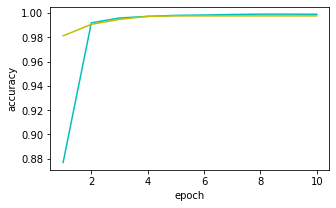

In [7]:
#Draw the accuracy curve in the training process
plt.figure(figsize=(5, 3))
plt.plot(range(1,11), process.history["acc"], c="c")
plt.plot(range(1,11), process.history["val_acc"], c="y")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.show()

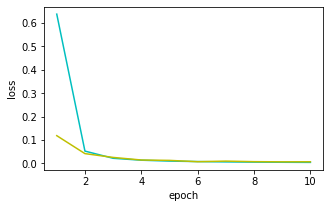

In [8]:
#Draw the loss curve during the process
plt.figure(figsize=(5, 3))
plt.plot(range(1,11), process.history["loss"], c="c")
plt.plot(range(1,11), process.history["val_loss"], c="y")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()

auc为: 0.9975483650637803


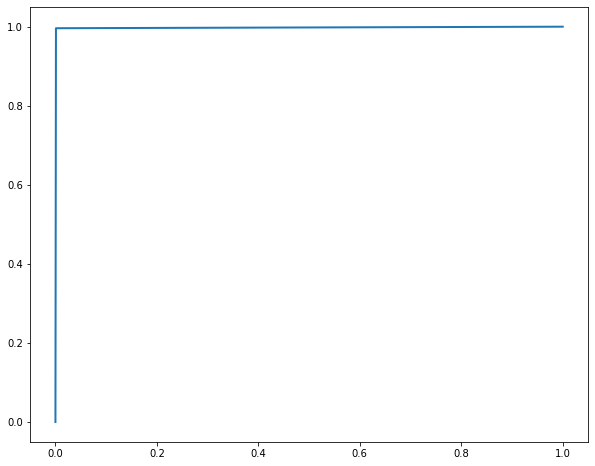

In [9]:
#auc
y_pred = cnn.predict(X_val)
y_pred = y_pred>0.5
y_p = []
for i in range(y_pred.shape[0]):
    for j in range(y_pred.shape[1]):
        if y_pred[i][j] == True and j > 1:
            y_p.append(1)
        elif y_pred[i][j] == True and j == 0:
            y_p.append(0)
for i in range(len(Y_val)):
    if Y_val[i] > 1:
        Y_val[i] = 1
fpr, tpr, thres = roc_curve(y_p, Y_val)
print("auc为:", auc(fpr, tpr))
#ROC curve
fig,ax = plt.subplots(figsize=(10,8))

ax.plot(fpr, tpr, linewidth=2,
        label='(AUC={})'.format(str(round(auc(fpr, tpr),3))))
plt.show()